**Importando as bibliotecas**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr, kendalltau


In [4]:
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

**Carregando os dados**

In [5]:
# Lendo o arquivo CSV
df = pd.read_csv('train - train.csv')
df.head() #visualizando cabeçalho do dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

**Conhecendo mais sobre o dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Verificando dados
print ("Tabela 1 - Verificação de dados")
print(df.info())
print("\n") #paragráfo entre os resultados

# Verificando se há algum valor vazio
print ("Tabela 2 - Verificação de dados vazios")
print(df.isna().any())
print("\n")

# Verificando quantidade de dados vazios
print ("Tabela 3 - Verificação de quantidade de dados vazios")
print(df.isna().sum())
print("\n")

Tabela 1 - Verificação de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

In [8]:
# Definindo a exibição completa de colunas
pd.set_option('display.max_rows', 100)  # Ajuste esse número para ser maior do que o total de colunas

# Verificando dados
print ("Tabela 1 - Verificação de dados")
print(df.info())
print("\n") #paragráfo entre os resultados

# Verificando se há algum valor vazio
print ("Tabela 2 - Verificação de dados vazios")
print(df.isna().any())
print("\n")

# Verificando quantidade de dados vazios
print ("Tabela 3 - Verificação de quantidade de dados vazios")
print(df.isna().sum())
print("\n")

Tabela 1 - Verificação de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

**Limpando o dataset**

In [9]:
# df.count() does not include NaN values
df_clean = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df_clean['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df_clean.columns:
        print(c, end=", ")
print('\n')
df = df_clean

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



**Conhecendo a variável dependente:** *housing price (valor de mercado)*

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_13169/4009015088.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

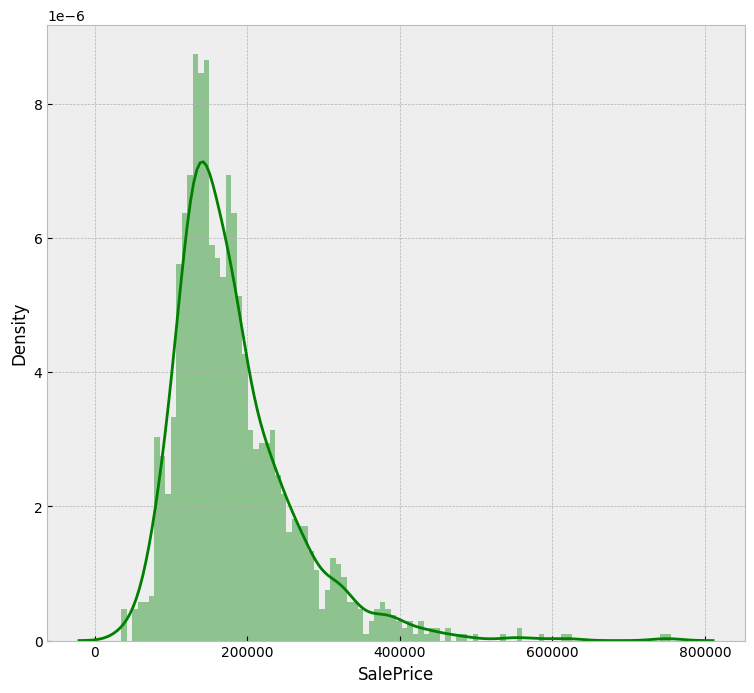

In [10]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

**Analisando dados numéricos**

In [11]:
# Verificando os tipos de dados que temos
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

**Conhecendo as distribuições**

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

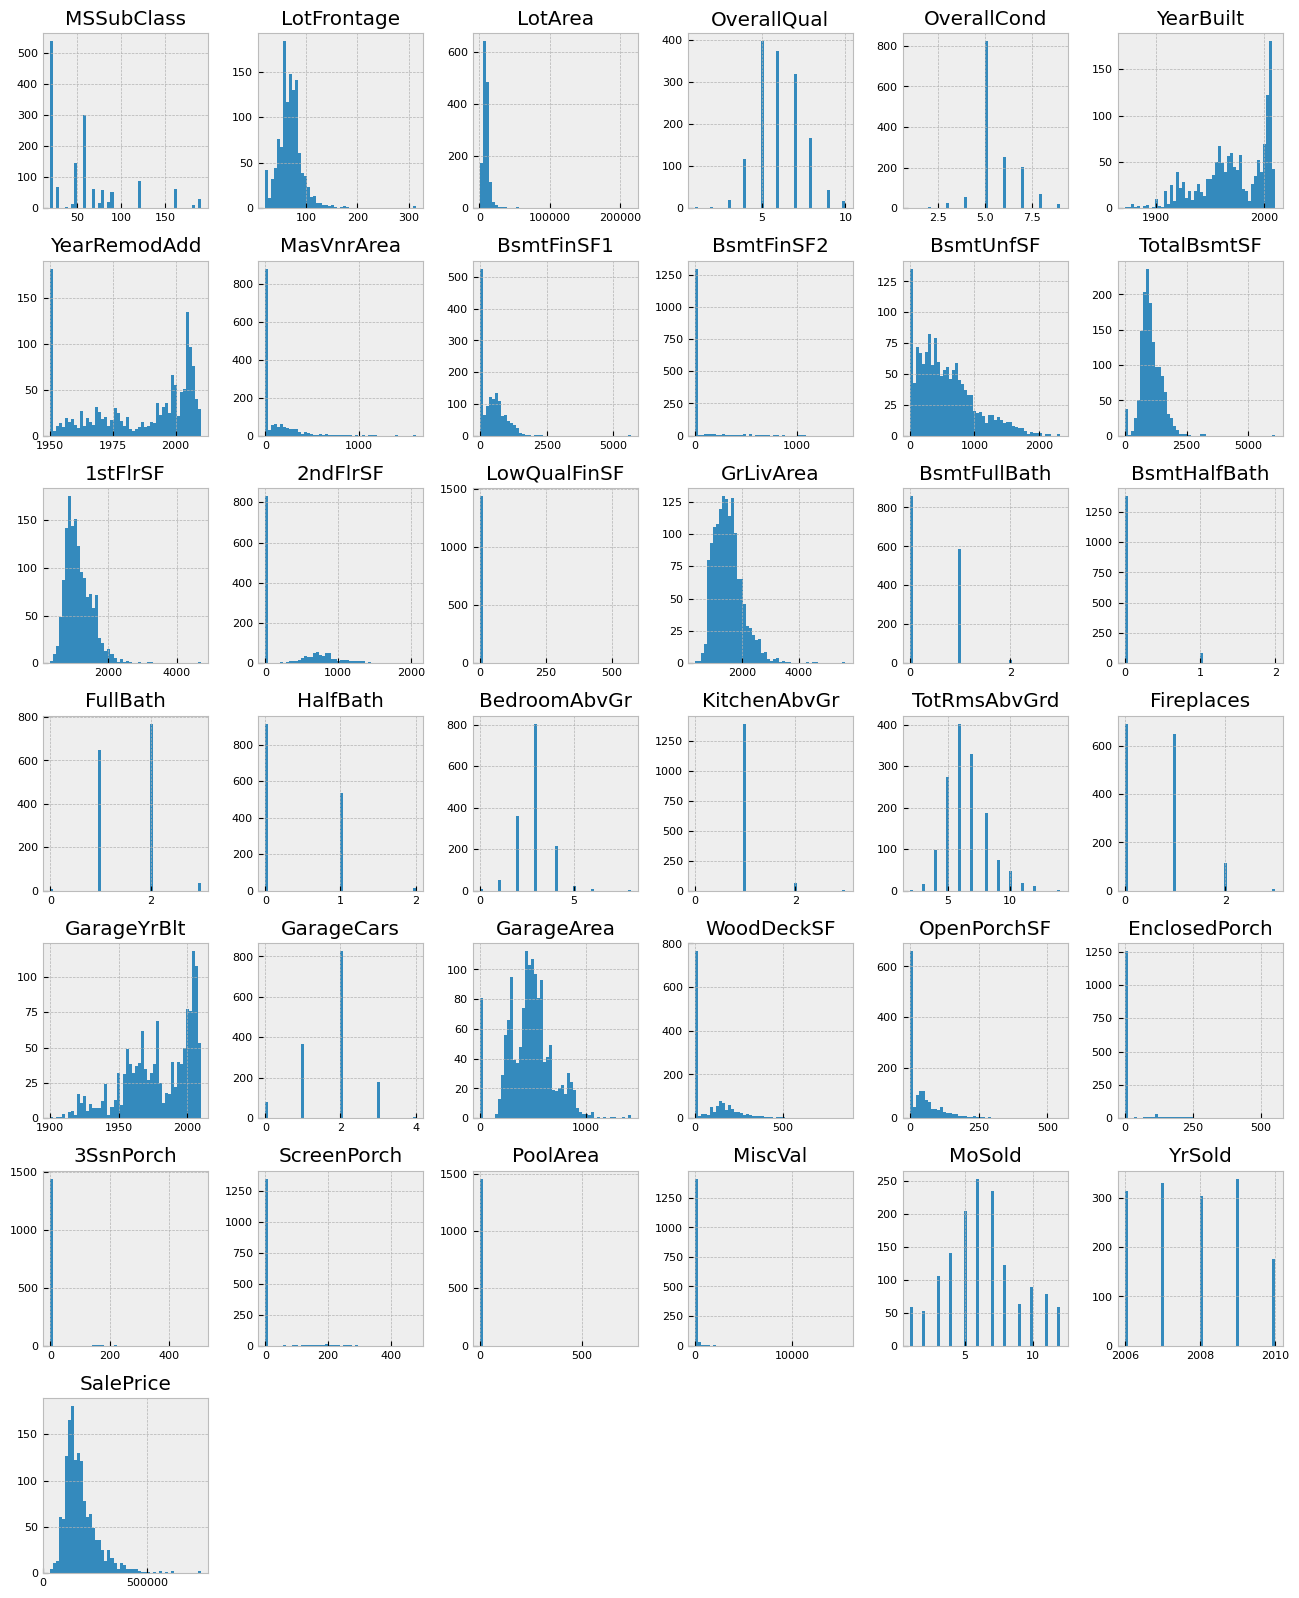

In [13]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

**Estudando a associação entre as variáveis**

In [14]:
print(df_num.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [ ]:
df_num_corr = df_num.corr()['SalePrice'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


**Visualizando associações entre duas variáveis**

<Axes: xlabel='SalePrice', ylabel='PoolArea'>

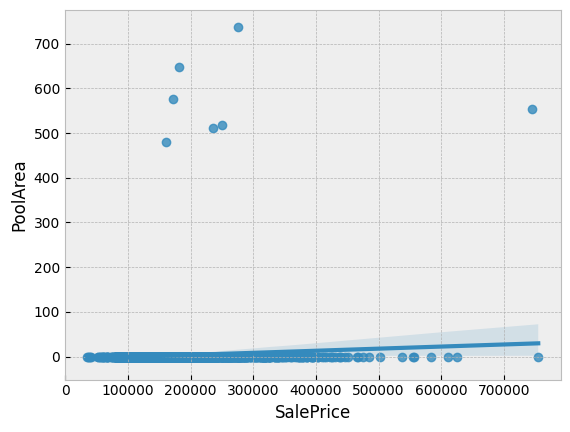

In [16]:
# visualizando a associação entre duas variáveis com modelo de tendência
sns.regplot(x=df_num["SalePrice"], y=df_num["PoolArea"])

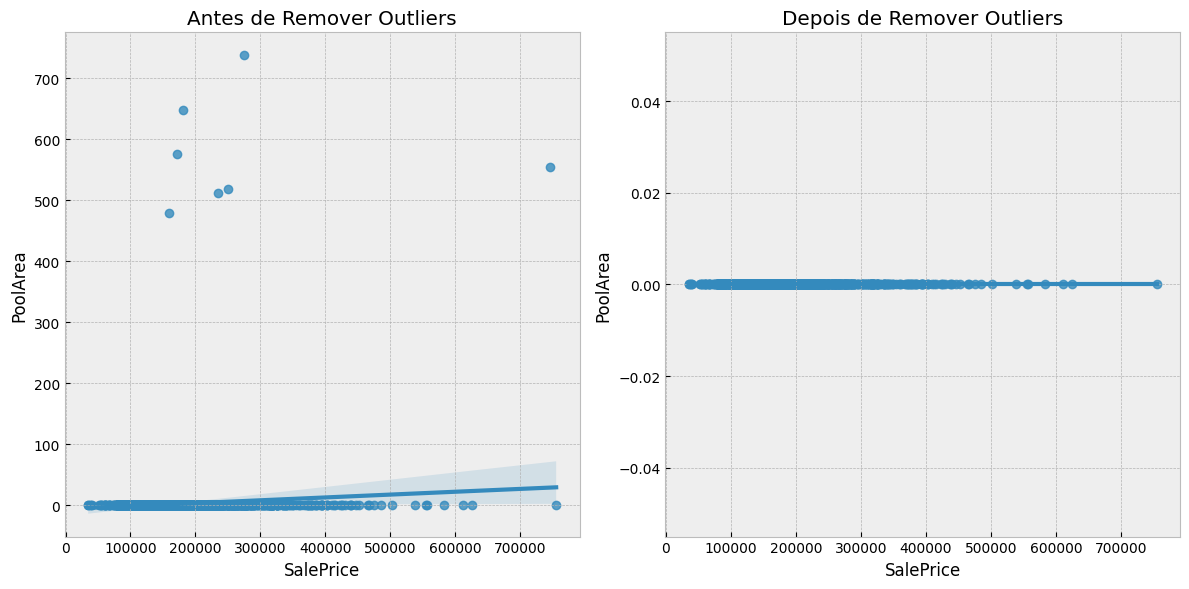

In [17]:
# Calcular os quartis e o intervalo interquartil (IQR)
Q1 = df_num['PoolArea'].quantile(0.25)
Q3 = df_num['PoolArea'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para considerar um valor como outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar os dados para remover os outliers
df_num_filtered = df_num[(df_num['PoolArea'] >= lower_bound) & (df_num['PoolArea'] <= upper_bound)]

# Plotar os dados antes e depois de remover os outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=df_num["SalePrice"], y=df_num["PoolArea"])
plt.title('Antes de Remover Outliers')

plt.subplot(1, 2, 2)
sns.regplot(x=df_num_filtered["SalePrice"], y=df_num_filtered["PoolArea"])
plt.title('Depois de Remover Outliers')

plt.tight_layout()
plt.show()

**Criando a compração de duas variáveis com modelo de regressão linear, R2 e coeficientes de correlação.**

/tmp/ipykernel_13169/3536784280.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, _ = pearsonr(df_num_filtered['SalePrice'], df_num_filtered['PoolArea'])
/tmp/ipykernel_13169/3536784280.py:17: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(df_num_filtered['SalePrice'], df_num_filtered['PoolArea'])


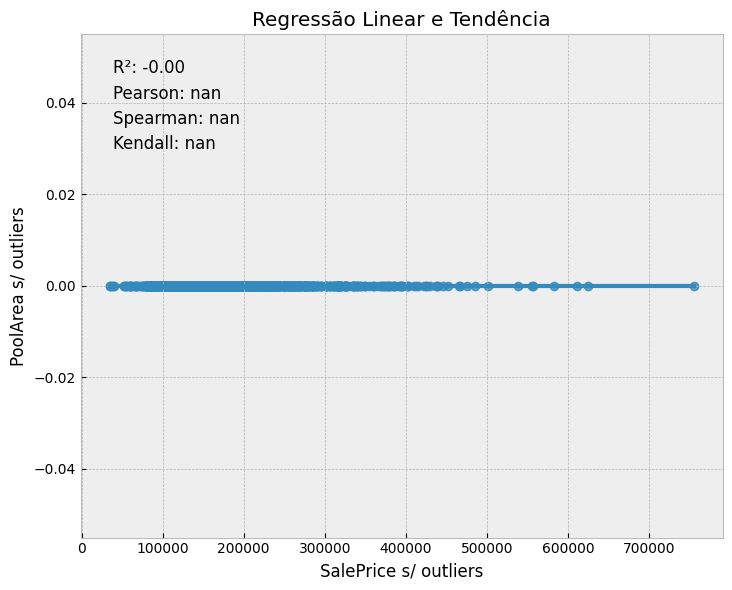

In [18]:
# Remover outliers da variável OverallQual se necessário
# Neste exemplo, assumimos que OverallQual não contém muitos outliers significativos
# Caso contrário, aplique uma lógica semelhante ao exemplo anterior para remover outliers

# Criar o modelo de regressão linear
X = sm.add_constant(df_num_filtered['PoolArea'])  # Adiciona a constante (intercepto) ao modelo
y = df_num_filtered['SalePrice']

model = sm.OLS(y, X).fit()  # Ajusta o modelo de regressão
predictions = model.predict(X)  # Faz previsões

# Coeficiente de determinação (R2)
r2 = model.rsquared

# Cálculo dos coeficientes de correlação
pearson_corr, _ = pearsonr(df_num_filtered['SalePrice'], df_num_filtered['PoolArea'])
spearman_corr, _ = spearmanr(df_num_filtered['SalePrice'], df_num_filtered['PoolArea'])
kendall_corr, _ = kendalltau(df_num_filtered['SalePrice'], df_num_filtered['PoolArea'])

# Visualização
plt.figure(figsize=(14, 6))

# Gráfico com o modelo de regressão
plt.subplot(1, 2, 1)
sns.regplot(x=df_num_filtered["SalePrice"], y=df_num_filtered["PoolArea"])
plt.title('Regressão Linear e Tendência')
plt.xlabel('SalePrice s/ outliers')
plt.ylabel('PoolArea s/ outliers')

# Adicionar anotações sobre os coeficientes
plt.text(0.05, 0.95, f'R²: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Pearson: {pearson_corr:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f'Spearman: {spearman_corr:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.80, f'Kendall: {kendall_corr:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

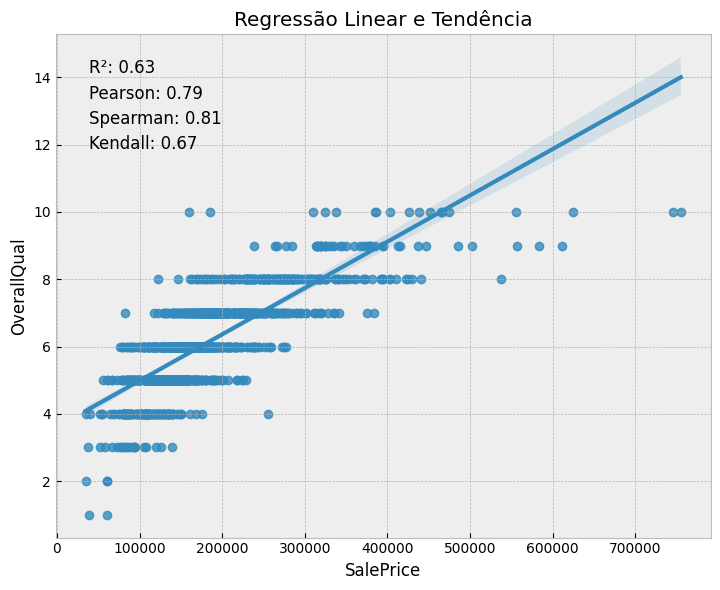

In [19]:
# Criar o modelo de regressão linear
X = sm.add_constant(df_num['OverallQual'])  # Adiciona a constante (intercepto) ao modelo
y = df_num['SalePrice']

model = sm.OLS(y, X).fit()  # Ajusta o modelo de regressão
predictions = model.predict(X)  # Faz previsões

# Coeficiente de determinação (R2)
r2 = model.rsquared

# Cálculo dos coeficientes de correlação
pearson_corr, _ = pearsonr(df_num['SalePrice'], df_num['OverallQual'])
spearman_corr, _ = spearmanr(df_num['SalePrice'], df_num['OverallQual'])
kendall_corr, _ = kendalltau(df_num['SalePrice'], df_num['OverallQual'])

# Visualização
plt.figure(figsize=(14, 6))

# Gráfico com o modelo de regressão
plt.subplot(1, 2, 1)
sns.regplot(x=df_num["SalePrice"], y=df_num["OverallQual"])
plt.title('Regressão Linear e Tendência')
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')

# Adicionar anotações sobre os coeficientes
plt.text(0.05, 0.95, f'R²: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'Pearson: {pearson_corr:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f'Spearman: {spearman_corr:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.80, f'Kendall: {kendall_corr:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

**Visualizando associações todas as variáveis**

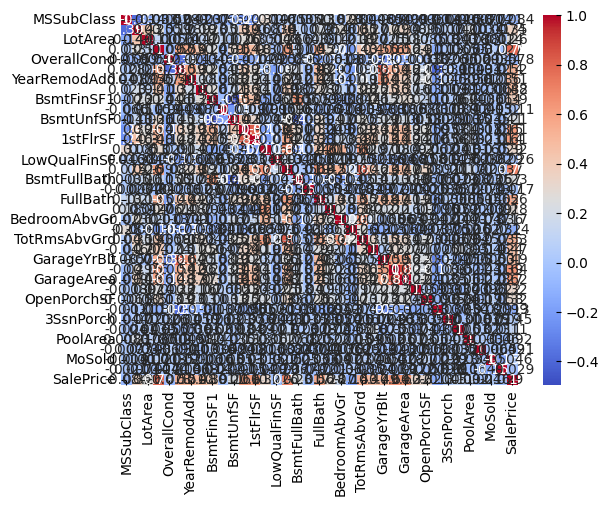

In [24]:
corr = df_num.corr()  # calcula a matriz de correlação
sns.heatmap(corr, annot=True, cmap='coolwarm')  # plota o heatmap com valores anotados
plt.show()

**Relacionando a variável de interesse com as outras variáveis numéricas**

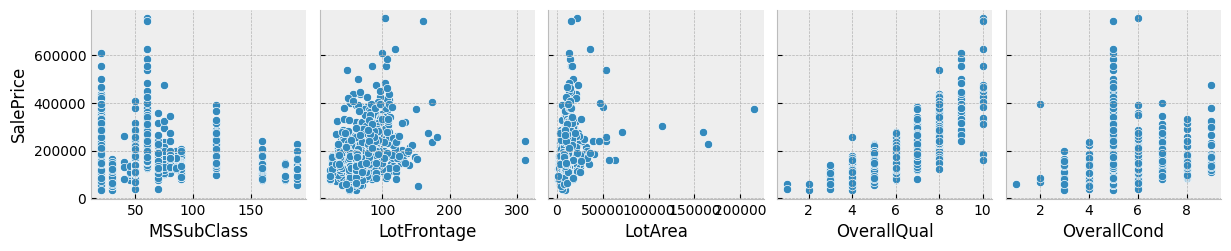

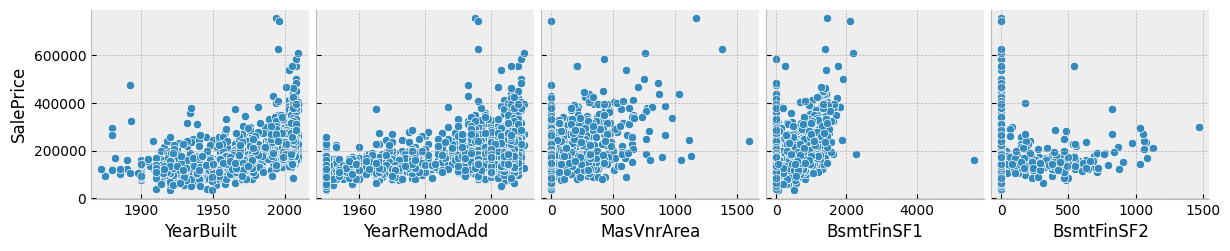

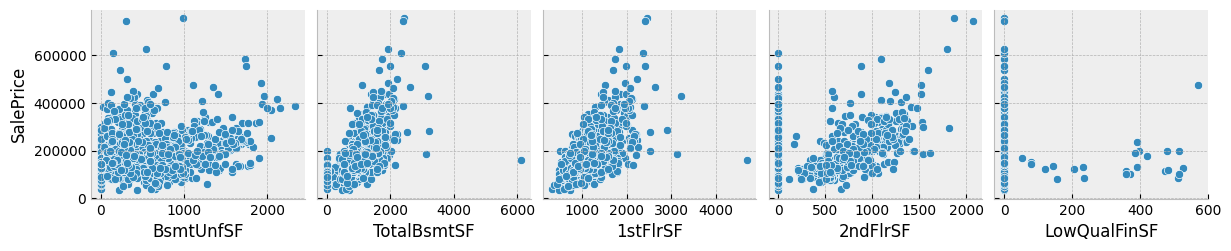

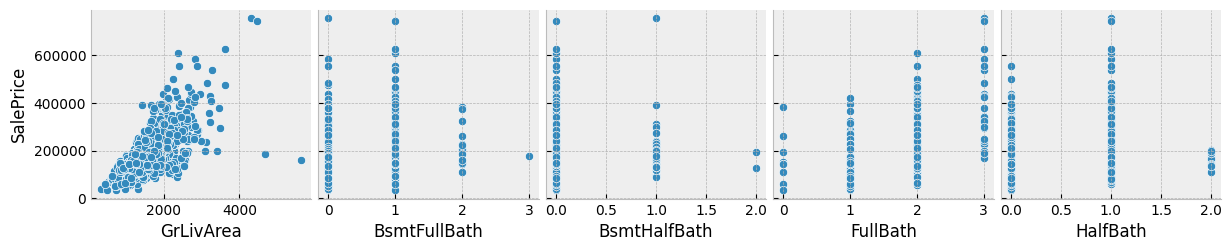

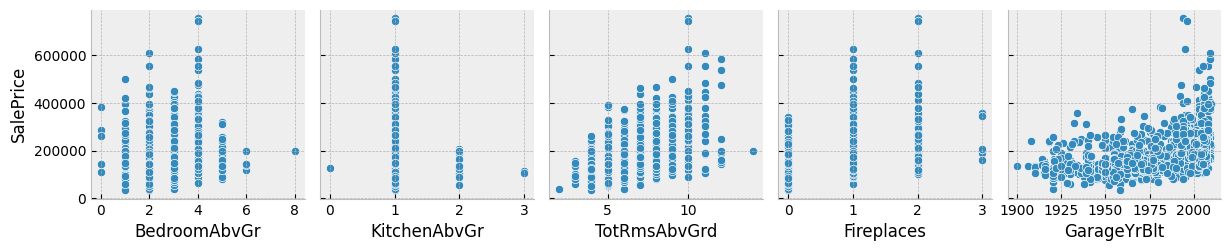

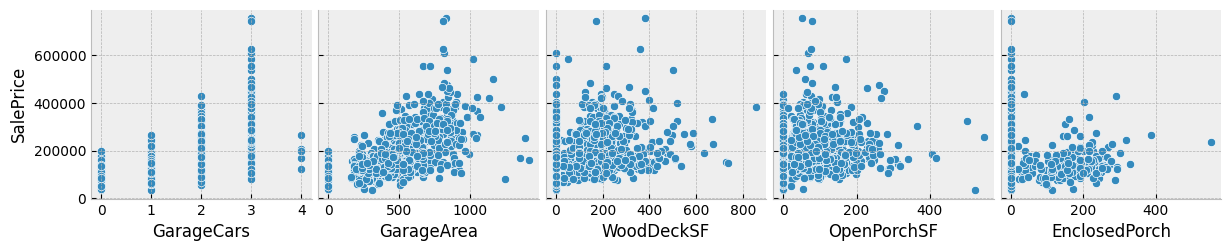

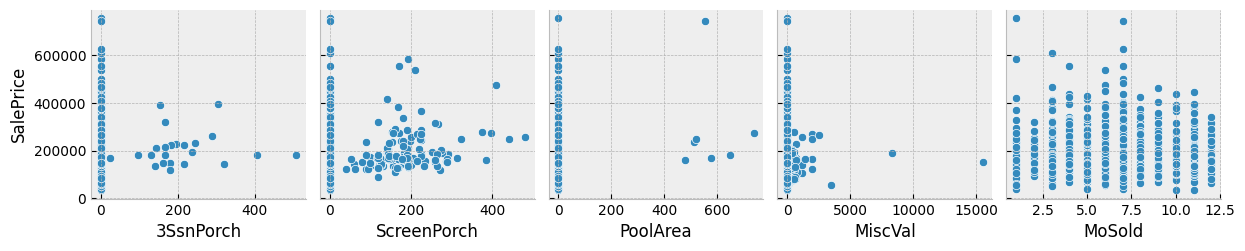

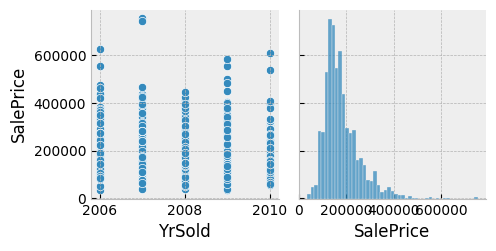

In [25]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

**Matriz de correlação com cálculo de significância**

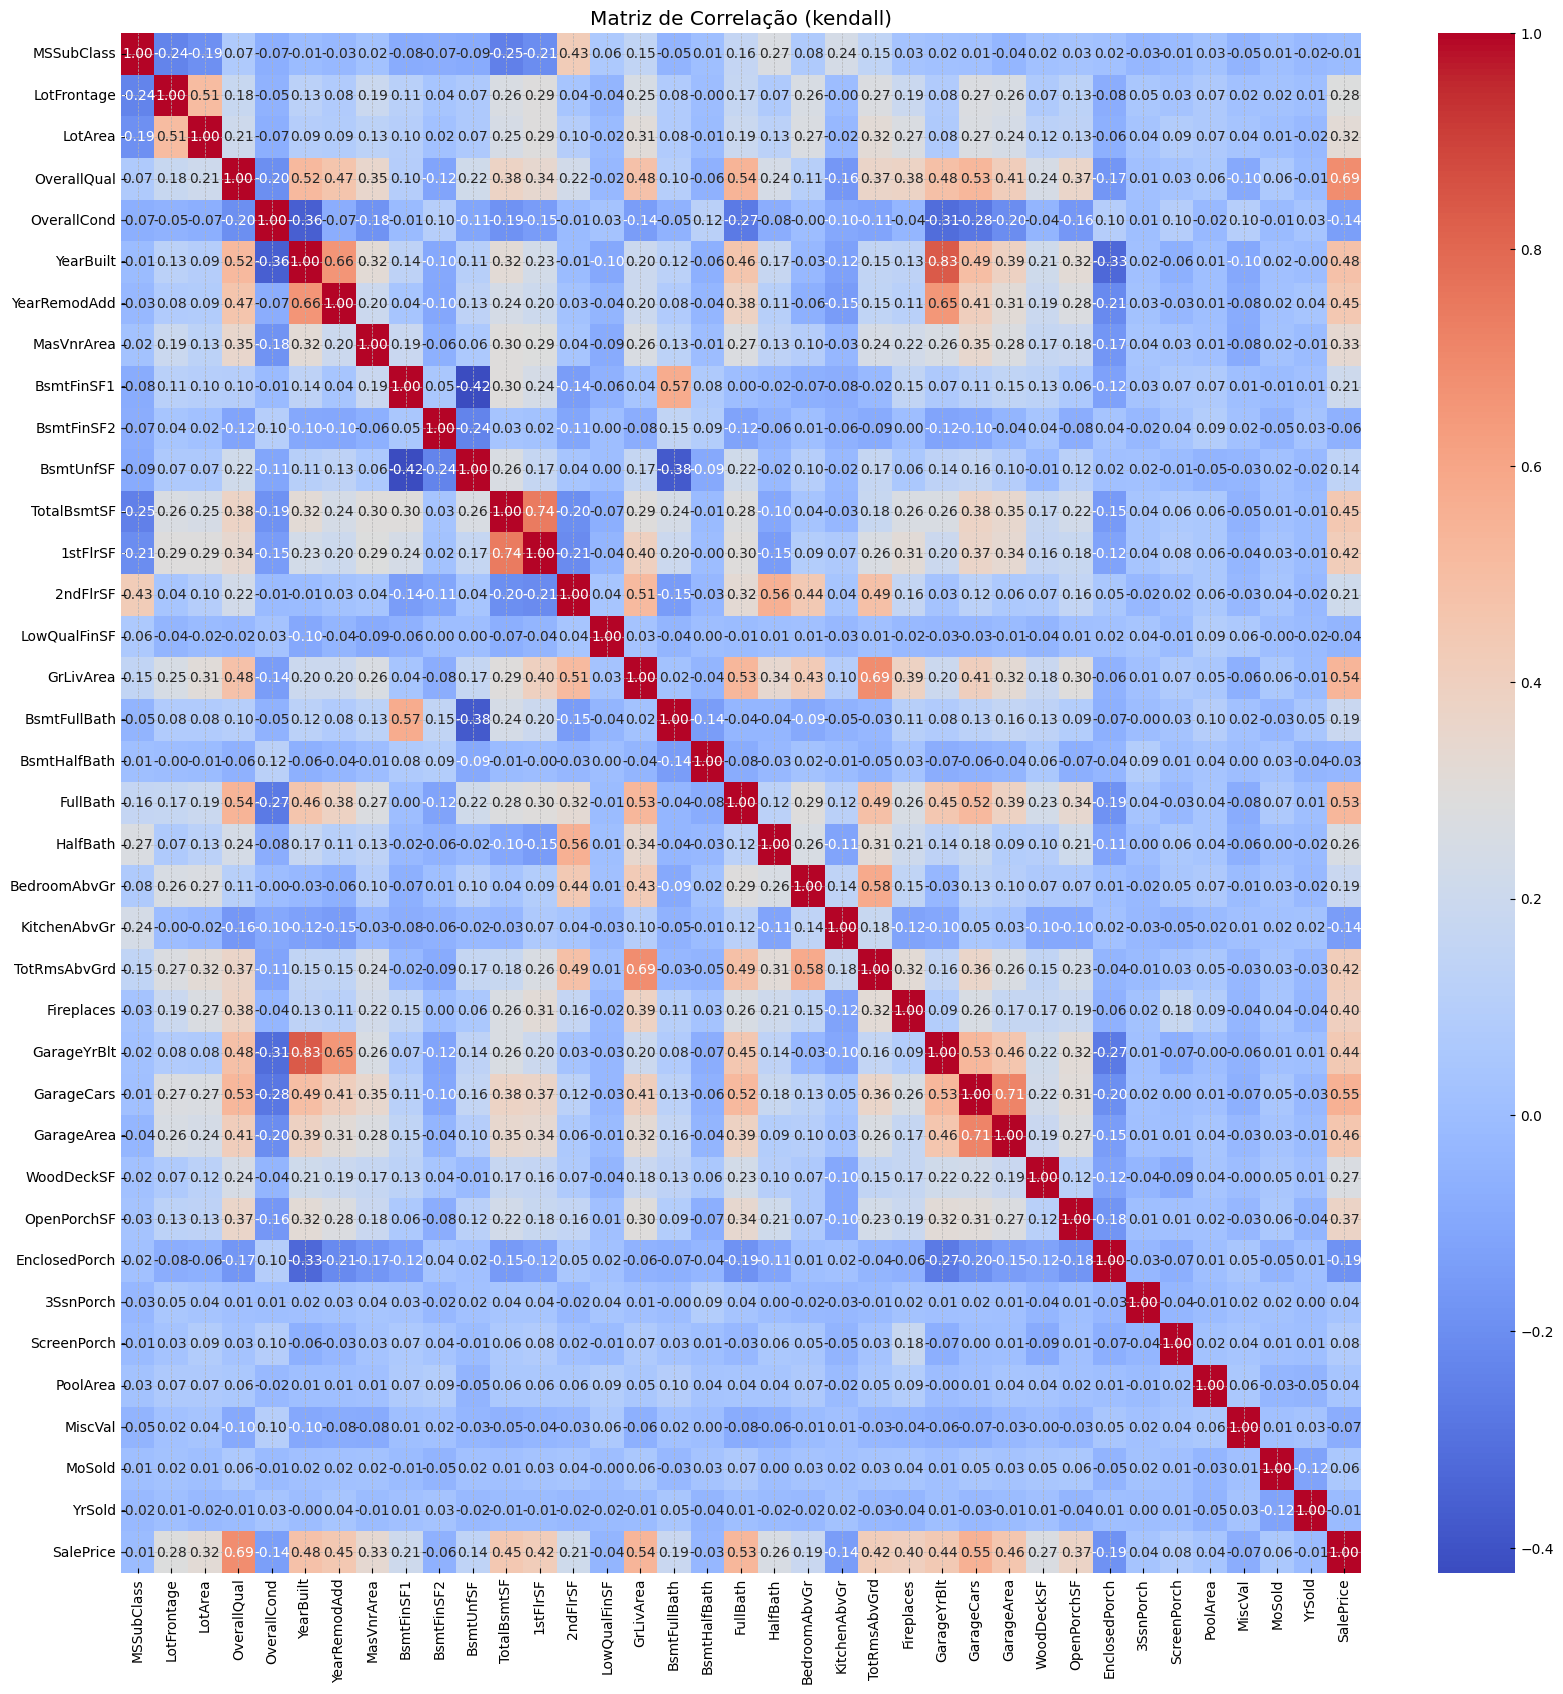

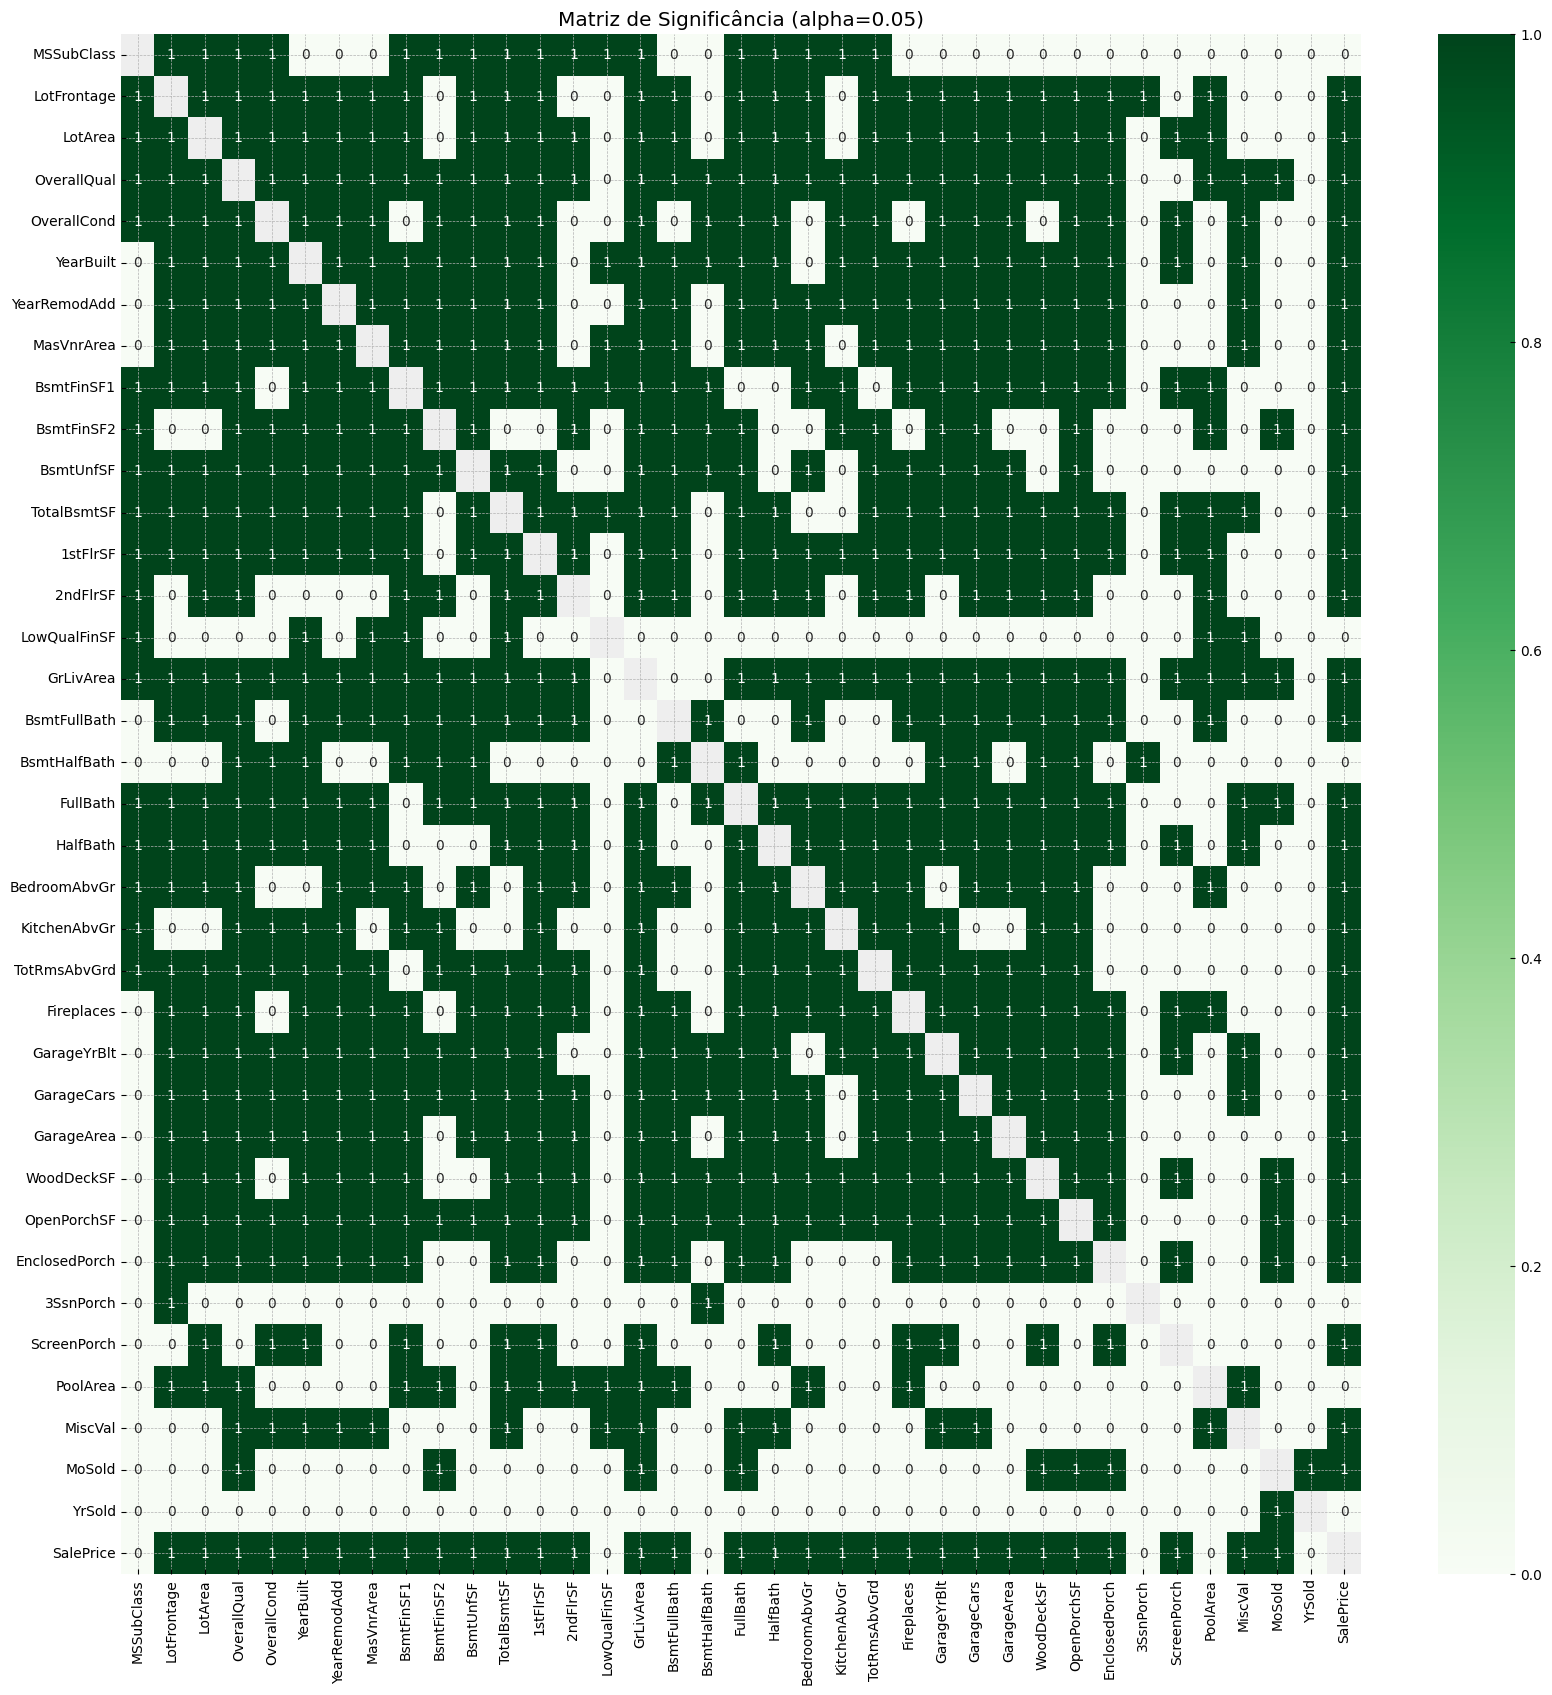

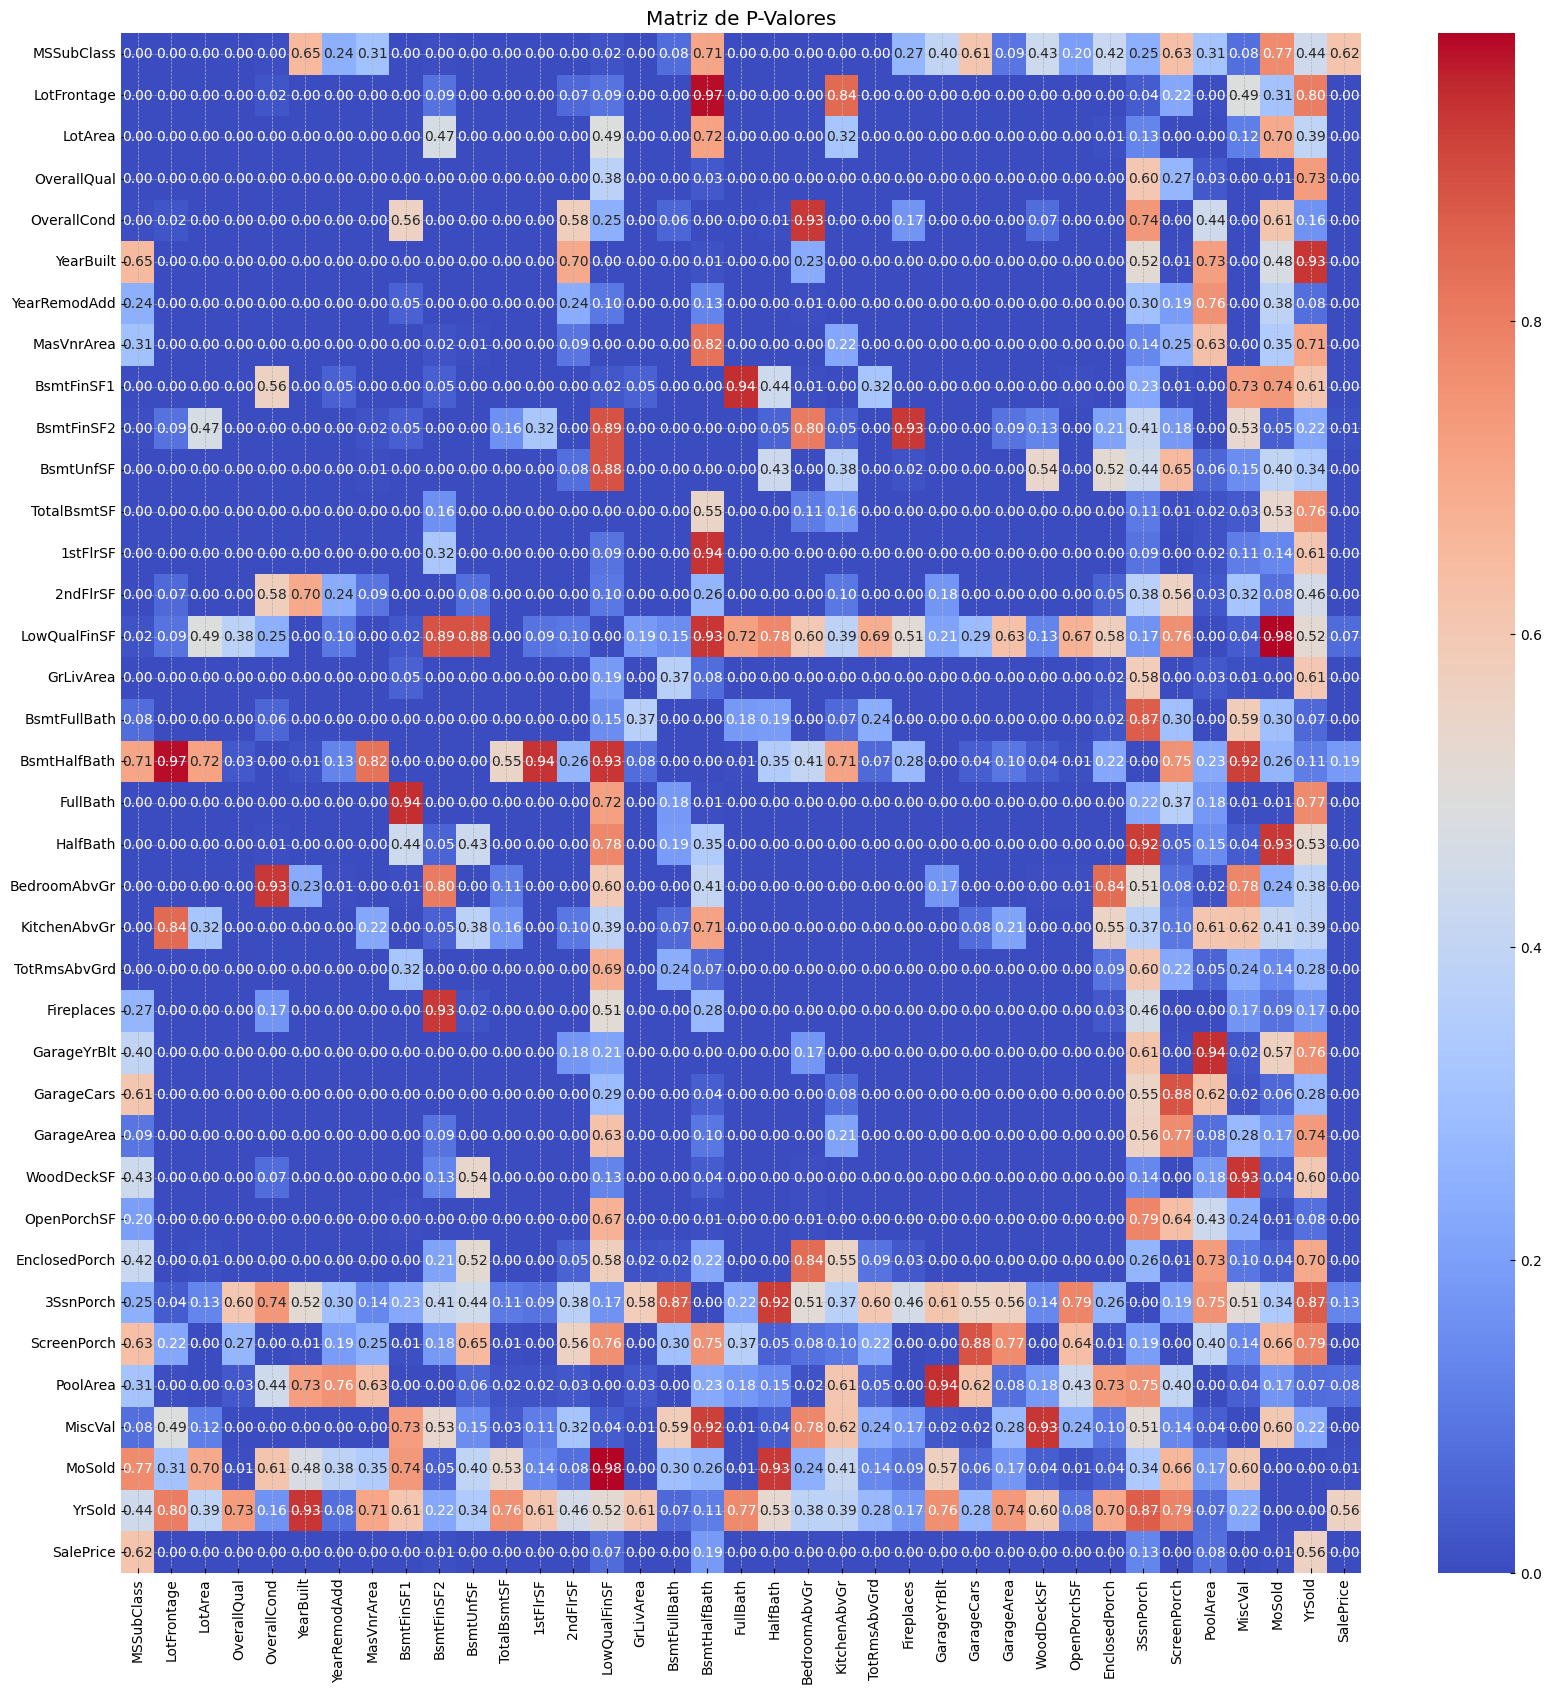

In [29]:
# Carregar os dados
df = df_num.copy()

# Tratar valores NaN e infinitos
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()  # Ou use df.fillna(method='ffill') para preencher NaNs

# Função para calcular a matriz de correlação com diferentes coeficientes
def calcular_correlacao(df, metodo='kendall'):
    return df.corr(method=metodo)

# Função para calcular p-valores usando diferentes métodos de correlação
def calcular_pvalores(df, metodo='kendall', alpha=0.05):
    num_vars = df.shape[1]
    p_values = np.zeros((num_vars, num_vars))
    sig_matriz = np.zeros((num_vars, num_vars))

    for i in range(num_vars):
        for j in range(num_vars):
            if i != j:
                try:
                    if metodo == 'pearson':
                        _, p_value = pearsonr(df.iloc[:, i], df.iloc[:, j])
                    elif metodo == 'spearman':
                        _, p_value = spearmanr(df.iloc[:, i], df.iloc[:, j])
                    elif metodo == 'kendall':
                        _, p_value = kendalltau(df.iloc[:, i], df.iloc[:, j])
                    else:
                        raise ValueError("Método de correlação desconhecido.")
                    p_values[i, j] = p_value
                    sig_matriz[i, j] = 1 if p_value < alpha else 0
                except ValueError:
                    p_values[i, j] = np.nan
                    sig_matriz[i, j] = np.nan
            else:
                sig_matriz[i, j] = np.nan

    return pd.DataFrame(sig_matriz, columns=df.columns, index=df.columns), pd.DataFrame(p_values, columns=df.columns, index=df.columns)

# Escolha do coeficiente de correlação e nível de significância
coeficiente = 'kendall'  # 'pearson' ou 'spearman' também são válidos
nivel_significancia = 0.05

# Gerar a matriz de correlação
matriz_correlacao = calcular_correlacao(df, metodo=coeficiente)

# Visualizar a matriz de correlação
plt.figure(figsize=(20, 20))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Matriz de Correlação ({coeficiente})')
plt.show()

# Calcular e visualizar a significância
matriz_significancia, matriz_pvalores = calcular_pvalores(df, metodo=coeficiente, alpha=nivel_significancia)

# Visualizar a matriz de significância
plt.figure(figsize=(20, 20))
sns.heatmap(matriz_significancia, annot=True, cmap='Greens', fmt='.0f')
plt.title(f'Matriz de Significância (alpha={nivel_significancia})')
plt.show()

# Visualizar a matriz de p-valores
plt.figure(figsize=(20, 20))
sns.heatmap(matriz_pvalores, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de P-Valores')
plt.show()